# Part1: Preprocessing

In [1]:
#loading the kidney disease data
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 26)
data = pd.read_csv(r'C:\Users\Moudhaffer\OneDrive\Desktop\Dataset\kidney_disease.csv')

In [3]:
data.head(10).style.background_gradient(cmap = 'copper')

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.000000,80.000000,1.020000,1.000000,0.000000,nan,normal,notpresent,notpresent,121.000000,36.000000,1.200000,nan,nan,15.400000,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.000000,50.000000,1.020000,4.000000,0.000000,nan,normal,notpresent,notpresent,nan,18.000000,0.800000,nan,nan,11.300000,38,6000,nan,no,no,no,good,no,no,ckd
2,62.000000,80.000000,1.010000,2.000000,3.000000,normal,normal,notpresent,notpresent,423.000000,53.000000,1.800000,nan,nan,9.600000,31,7500,nan,no,yes,no,poor,no,yes,ckd
3,48.000000,70.000000,1.005000,4.000000,0.000000,normal,abnormal,present,notpresent,117.000000,56.000000,3.800000,111.000000,2.500000,11.200000,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.000000,80.000000,1.010000,2.000000,0.000000,normal,normal,notpresent,notpresent,106.000000,26.000000,1.400000,nan,nan,11.600000,35,7300,4.6,no,no,no,good,no,no,ckd
5,60.000000,90.000000,1.015000,3.000000,0.000000,nan,nan,notpresent,notpresent,74.000000,25.000000,1.100000,142.000000,3.200000,12.200000,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68.000000,70.000000,1.010000,0.000000,0.000000,nan,normal,notpresent,notpresent,100.000000,54.000000,24.000000,104.000000,4.000000,12.400000,36,nan,nan,no,no,no,good,no,no,ckd
7,24.000000,nan,1.015000,2.000000,4.000000,normal,abnormal,notpresent,notpresent,410.000000,31.000000,1.100000,nan,nan,12.400000,44,6900,5,no,yes,no,good,yes,no,ckd
8,52.000000,100.000000,1.015000,3.000000,0.000000,normal,abnormal,present,notpresent,138.000000,60.000000,1.900000,nan,nan,10.800000,33,9600,4,yes,yes,no,good,no,yes,ckd
9,53.000000,90.000000,1.020000,2.000000,0.000000,abnormal,abnormal,present,notpresent,70.000000,107.000000,7.200000,114.000000,3.700000,9.500000,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [4]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [5]:
#changing the data columns
data.rename(columns={'bp': 'Dias_blood_pressure', 'sg': 'ur_specific_gravity','al':'ur_albumin','su':'ur_sugar','rbc':'red_blood_cells','pc':'ur_pus_cell','pcc':'ur_ pus_cell clumps','ba':'ur_bacteria','bgr':'blood glucose random','bu':'blood urea','sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume','wbcc':'white blood cell count','rbcc':'red blood cell count','htn':'hypertension','dm':'diabetes','cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'class'},inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   Dias_blood_pressure      388 non-null    float64
 2   ur_specific_gravity      353 non-null    float64
 3   ur_albumin               354 non-null    float64
 4   ur_sugar                 351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   ur_pus_cell              335 non-null    object 
 7   ur_ pus_cell clumps      396 non-null    object 
 8   ur_bacteria              396 non-null    object 
 9   blood glucose random     356 non-null    float64
 10  blood urea               381 non-null    float64
 11  serum creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3


**Dias_blood_pressure / hypertension:** The diastolic pressure, is the pressure in the arteries when the heart rests between beats. This is the time when the heart fills with blood and gets oxygen.
This is what your diastolic blood pressure number means:
- Normal: Lower than 80
- Stage 1 hypertension: 80-89
- Stage 2 hypertension: 90 or more
- Hypertensive crisis: 120 or more.

**ur_specific_gravity :** Urine specific gravity is a laboratory test that shows the concentration of all chemical particles in the urine.

**ur_albumin :** The albumin urine test measures the amount of albumin in a urine sample.  Albuminuria is a sign of kidney disease and means that you have too much albumin in your urine. Albumin is a protein found in the blood. A healthy kidney doesn’t let albumin pass from the blood into the urine. A damaged kidney lets some albumin pass into the urine. The less albumin in your urine, the better.

**ur_sugar :** The glucose urine test measures the amount of sugar (glucose) in a urine sample. The presence of glucose in the urine is called glycosuria or glucosuria. Glucose is not usually found in urine. If it is, further testing is needed.
Normal glucose range in urine: 0 to 0.8 mmol/l (0 to 15 mg/dL)

**red_blood_cells / red blood cell count :** Red blood cells are one of the major components of blood, along with white blood cells and platelets. Red blood cells help carry oxygen throughout the body. A high red blood cell count means the number of red blood cells in your bloodstream is higher than normal. Normal red blood cell counts are:
- For men, 4.7 to 6.1 million red blood cells per microliter of blood
- For women, 4.2 to 5.4 million red blood cells per microliter of blood
- For children, 4.0 to 5.5 million red blood cells per microliter of blood

**ur_pus_cell / ur_ pus_cell clumps:** Presence of pus cells in urine defined as pyuria is an important accompaniment of bacteriuria which may be asymptomatic or can indicate toward underlying urinary tract infection.

**ur_bacteria :** Presence of bacteria in urine .
 
**blood glucose random / diabetes:** Random glucose testing is a blood test done at a random  moment of the day to check glucose (sugar) levels.   values of 200 mg/dL or above can indicate diabetes.
 
**blood urea :** A blood urea nitrogen (BUN) test measures the amount of nitrogen in your blood that comes from the waste product urea. Urea is made when protein is broken down in your body. Urea is made in the liver and passed out of your body in the urine. A BUN test is done to see how well your kidneys are working. In general, around 6 to 24 mg/dL (2.1 to 8.5 mmol/L) is considered normal. 

**serum creatinine :** Creatinine is a waste product that comes from the normal wear and tear on muscles of the body. Everyone has creatinine in their bloodstream. The normal level of creatinine depends on your age, race, gender, and body size. In general , a normal result is 0.7 to 1.3 mg/dL for men and 0.6 to 1.1 mg/dL for women.
 
**sodium :**  A normal blood sodium level is between 135 and 145 milliequivalents per liter (mEq/L). Hyponatremia occurs when the sodium in your blood falls below 135 mEq/L.

**potassium :** Normally, your blood potassium level is 3.6 to 5.2 millimoles per liter (mmol/L). A very low potassium level (less than 2.5 mmol/L ) can be life-threatening and requires urgent medical attention.

**hemoglobin /  anemia :** A hemoglobin test measures the amount of hemoglobin in your blood. Hemoglobin is a protein in your red blood cells that carries oxygen to your body's organs and tissues and transports carbon dioxide from your organs and tissues back to your lungs. An Hb value less than 5.0 g/dL can lead to heart failure and death. The normal range for hemoglobin is:
- For men, 13.5 to 17.5 grams per deciliter
- For women, 12.0 to 15.5 grams per deciliter  
Anything below that is considered a form of anemia.

**packed cell volume :** The packed cell volume (PCV) is a measurement of the proportion of blood that is made up of cells. The value is expressed as a percentage or fraction of cells in blood. For example, a PCV of 40% means that there are 40 millilitres of cells in 100 millilitres of blood. Critical value are  <18% and >55% (for adults)

**white blood cell count:** White blood cell count varies from person to person , the normal range is usually between 4,000 and 11,000 white blood cells per microlitre of blood. Anything below 4,000 is typically considered to be a low white blood cell count.
 
**coronary artery disease :** The coronary arteries supply blood, oxygen and nutrients to your heart. Coronary artery disease develops when the coronary arteries become damaged or diseased. The damage may be caused by various factors (Smoking / High blood pressure /High cholesterol /Diabetes /sedentary lifestyle...)
 
**appetit :** Appetite is the desire to eat food, sometimes due to hunger. A poor appetite is when your desire to eat is reduced. The medical term for a loss of appetite is anorexia. Any illness can reduce appetite. If the illness is treatable, the appetite should return when the condition is cured.

**pedal edema :** Pedal edema causes an abnormal accumulation of fluid in the ankles, feet, and lower legs causing swelling of the feet and ankles. Two mechanisms can cause edema of the feet. two most commun causes are being overweight and standing or sitting for long periods.
 
 

In [7]:
numeric_features = data.dtypes[data.dtypes != "object"].index
categorical_features = data.dtypes[data.dtypes == "object"].index

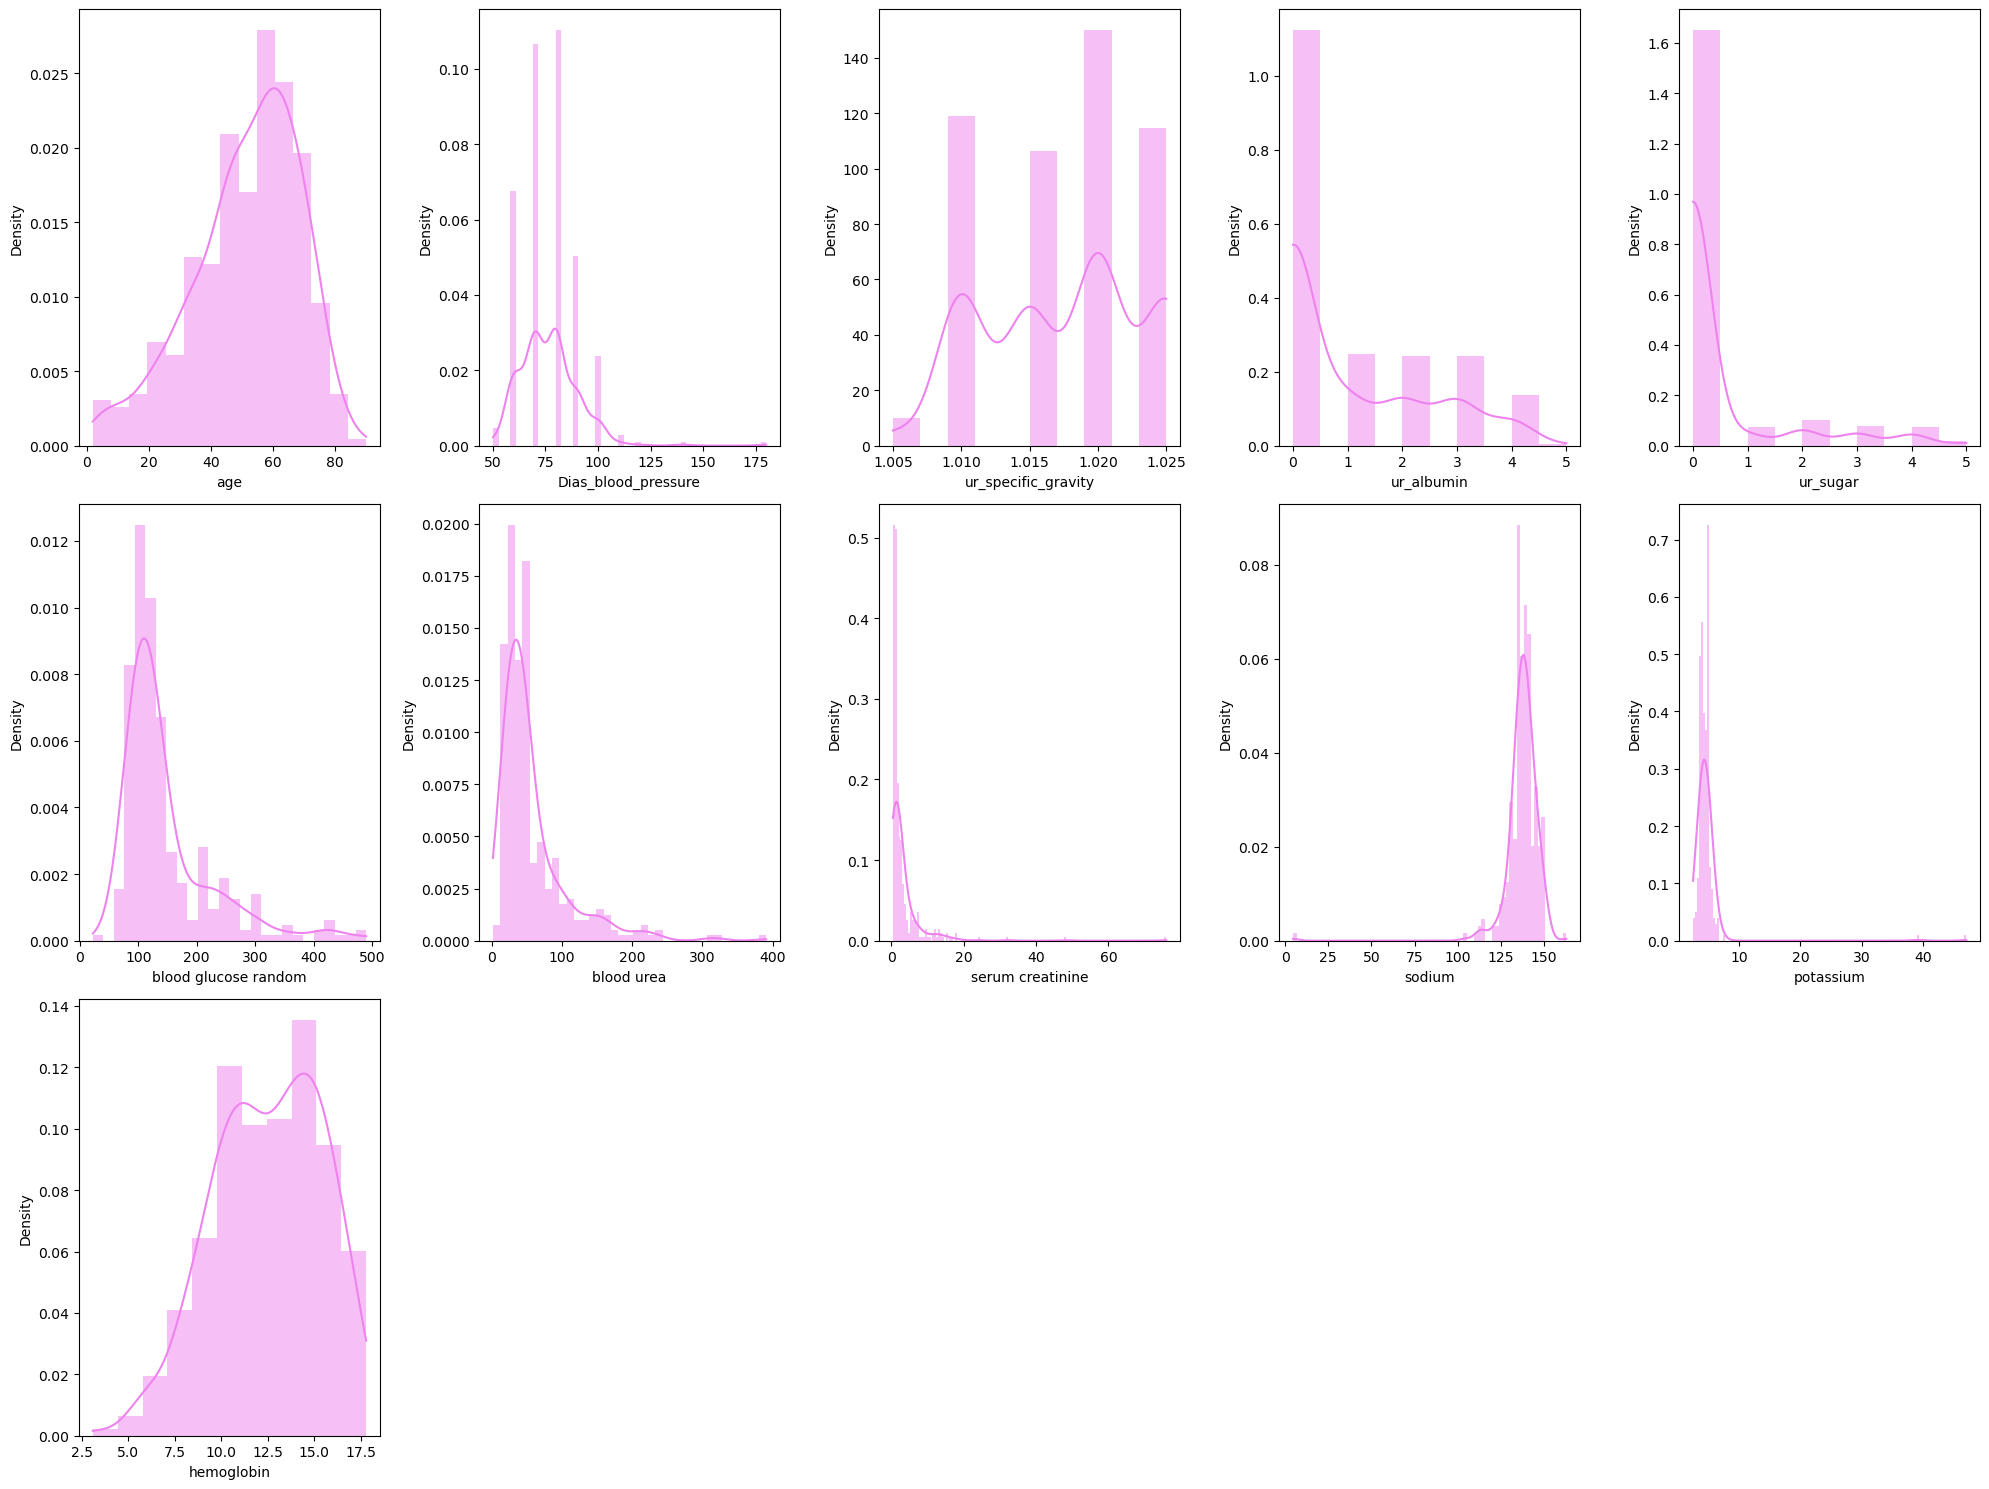

In [8]:
# checking numerical features distribution
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in numeric_features:
    if plotnumber <= 16:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot (data[column],color='violet',kde=True, stat="density", linewidth=0)
        plt.xlabel(column)
    
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [9]:
categorical_features

Index(['red_blood_cells', 'ur_pus_cell', 'ur_ pus_cell clumps', 'ur_bacteria',
       'packed cell volume', 'white blood cell count', 'red blood cell count',
       'hypertension', 'diabetes', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

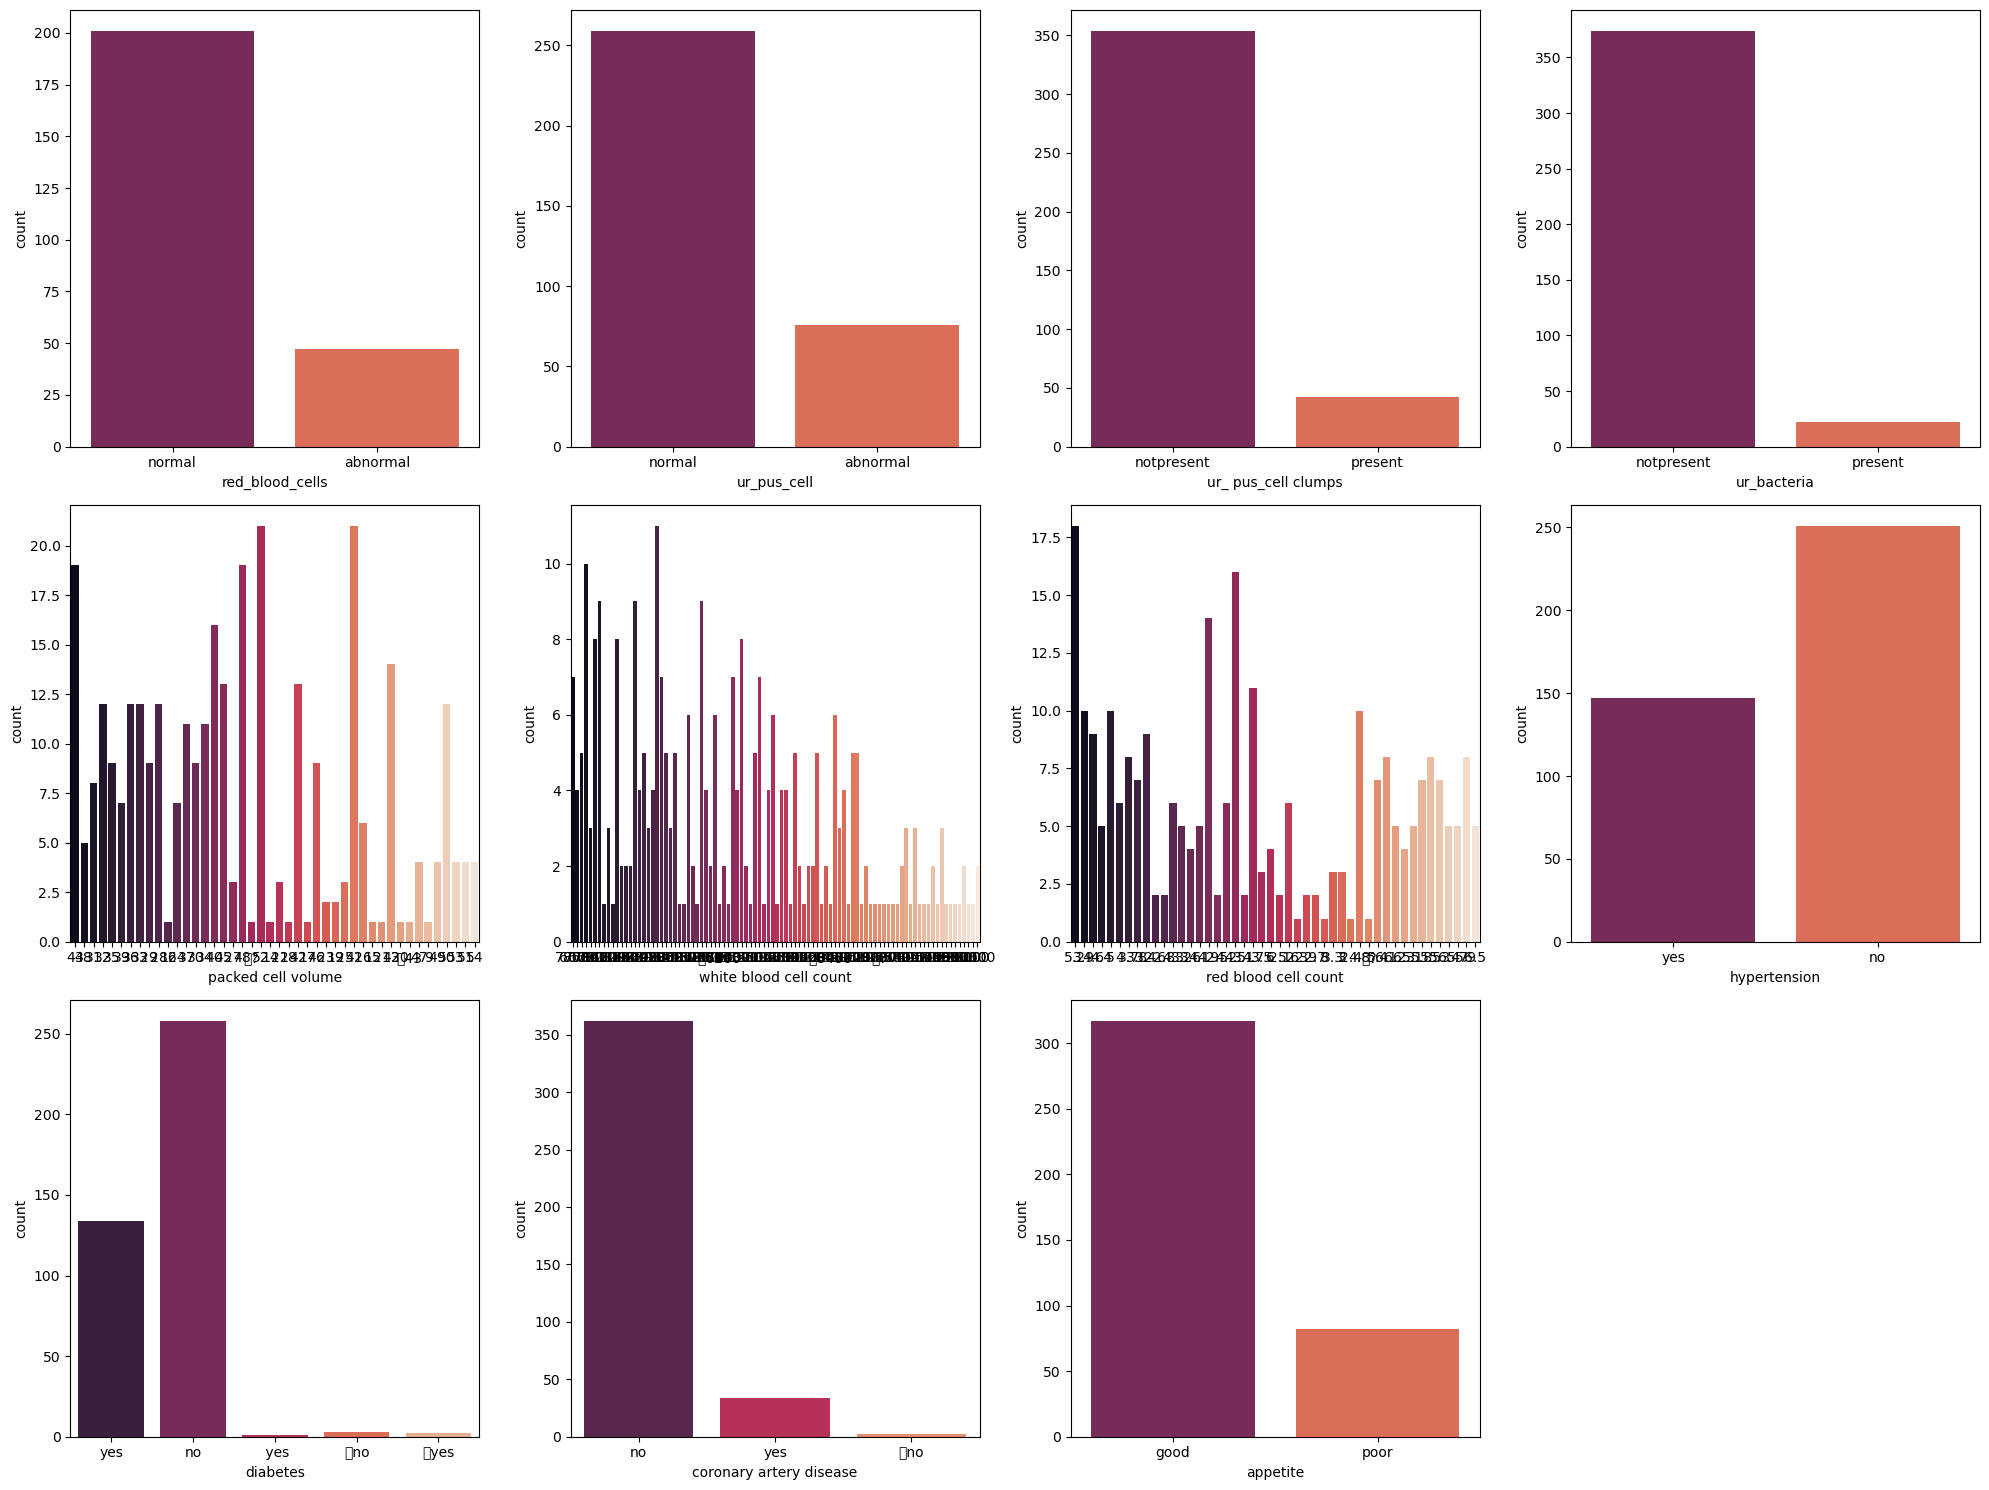

In [10]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1
for column in categorical_features:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(x = data[column], palette = 'rocket',color='black')
        plt.xlabel(column)        
    plotnumber += 1
plt.tight_layout()
plt.show()

In [11]:
#Checking for missing values
data.isnull().sum()

age                          9
Dias_blood_pressure         12
ur_specific_gravity         47
ur_albumin                  46
ur_sugar                    49
red_blood_cells            152
ur_pus_cell                 65
ur_ pus_cell clumps          4
ur_bacteria                  4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed cell volume          70
white blood cell count     105
red blood cell count       130
hypertension                 2
diabetes                     2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

## 1 . Data cleaning : 

**we have a lot of missing values in this dataframe , let's inspect the data to try to fill them with the suiting values**

In [12]:
data.tail(10).T

,390,391,392,393,394,395,396,397,398,399
age,52.0,36.0,57.0,43.0,50.0,55.0,42.0,12.0,17.0,58.0
Dias_blood_pressure,80.0,80.0,80.0,60.0,80.0,80.0,70.0,80.0,60.0,80.0
ur_specific_gravity,1.025,1.025,1.02,1.025,1.02,1.02,1.025,1.02,1.025,1.025
ur_albumin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ur_sugar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
red_blood_cells,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal
ur_pus_cell,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal
ur_ pus_cell clumps,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent
ur_bacteria,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent
blood glucose random,99.0,85.0,133.0,117.0,137.0,140.0,75.0,100.0,114.0,131.0


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
Dias_blood_pressure,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
ur_specific_gravity,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
ur_albumin,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
ur_sugar,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
blood glucose random,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
blood urea,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
serum creatinine,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sodium,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000
potassium,312.0,4.627244,3.193904,2.500,3.80,4.40,4.90,47.000


In [14]:
data.describe(exclude=[np.number]).T

,count,unique,top,freq
red_blood_cells,248,2,normal,201
ur_pus_cell,335,2,normal,259
ur_ pus_cell clumps,396,2,notpresent,354
ur_bacteria,396,2,notpresent,374
packed cell volume,330,44,41,21
white blood cell count,295,92,9800,11
red blood cell count,270,46,5.2,18
hypertension,398,2,no,251
diabetes,398,5,no,258
coronary artery disease,398,3,no,362


There is so much cleaning to do. let's take it step by step :  
- age is important in the diagnosis of kidney stone so we need to fill the missing values and verify the youg ages to know if children are included.
- Dias_blood_pressure & hypertension: what we have here is actually only the Diastolic blood pressure which is generally between 70 and 80 in healthy people , anything above that is considered hypertension patient.This with help us with the missing values in the hypertension column and vice versa.
- ur_sugar is actually sugar in urine. When blood glucose level is within normal limits(70 to 140 mg/dL), the urine does not contain any glucose (sugar). Otherwise , this can be an indicator of diabetes.
- the hemoglobin is a good indicator for anemia, normal hemoglobin values goes from 11 to  17 , anything below that should make us think of anemia .
- packed cell volume, white blood cell count and red blood cell count should be numeric not object .
- diabetes, coronary artery disease and class has more tha 2 unique values . let's investigate that.

**Let's start with categorical data first:**
- packed cell volume & white blood cell count & red blood cell count :

In [15]:
data['red blood cell count'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6', '2.1', '5.6', '2.3', '2.9', '2.7',
       '8', '3.3', '3', '2.4', '4.8', '\t?', '5.4', '6.1', '6.2', '6.3',
       '5.1', '5.8', '5.5', '5.3', '6.4', '5.7', '5.9', '6.5'],
      dtype=object)

In [16]:
data['packed cell volume'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [17]:
data['white blood cell count'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

there is typing errors in these 3 column ('packed cell volume','white blood cell count','red blood cell count') , let's correct that and then convert them to numeric type.

In [18]:
data['red blood cell count'].loc[(data['red blood cell count']=='\t?')] = 'NaN'
data['packed cell volume'].loc[(data['packed cell volume']=='\t?')] = 'NaN'
data['white blood cell count'].loc[(data['white blood cell count']=='\t?')] = 'NaN'
data['packed cell volume'].loc[(data['packed cell volume']=='\t43')] = '43'
data['white blood cell count'].loc[(data['white blood cell count']=='\t6200')] = '6200'
data['white blood cell count'].loc[(data['white blood cell count']=='\t8400')] = '8400'

In [19]:
data['packed cell volume'] = data['packed cell volume'].astype(float)
data['white blood cell count'] = data['white blood cell count'].astype(float)
data['red blood cell count'] = data['red blood cell count'].astype(float)

In [20]:
data.describe(exclude=[np.number]).T

,count,unique,top,freq
red_blood_cells,248,2,normal,201
ur_pus_cell,335,2,normal,259
ur_ pus_cell clumps,396,2,notpresent,354
ur_bacteria,396,2,notpresent,374
hypertension,398,2,no,251
diabetes,398,5,no,258
coronary artery disease,398,3,no,362
appetite,399,2,good,317
pedal edema,399,2,no,323
anemia,399,2,no,339


- diabetes :

In [21]:
data['diabetes'].unique()

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

there is clearly a typing error of the same kind in the diabetes column. let's replace them .

In [22]:
data['diabetes'].loc[(data['diabetes']=='\tno')] = 'no'
data['diabetes'].loc[(data['diabetes']=='\tyes')] = 'yes'
data['diabetes'].loc[(data['diabetes']==' yes')] = 'yes'
data['diabetes'].unique()

array(['yes', 'no', nan], dtype=object)

- coronary artery disease :

In [23]:
data['coronary artery disease'].unique()

array(['no', 'yes', '\tno', nan], dtype=object)

same typing error.

In [24]:
data['coronary artery disease'].loc[(data['coronary artery disease']=='\tno')] = 'no'

- class :

In [25]:
data['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

and a last time the same error in the class column.

In [26]:
data['class'].loc[(data['class']=='ckd\t')] = 'ckd'

In [27]:
data.describe(exclude=[np.number]).T

,count,unique,top,freq
red_blood_cells,248,2,normal,201
ur_pus_cell,335,2,normal,259
ur_ pus_cell clumps,396,2,notpresent,354
ur_bacteria,396,2,notpresent,374
hypertension,398,2,no,251
diabetes,398,2,no,261
coronary artery disease,398,2,no,364
appetite,399,2,good,317
pedal edema,399,2,no,323
anemia,399,2,no,339


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   Dias_blood_pressure      388 non-null    float64
 2   ur_specific_gravity      353 non-null    float64
 3   ur_albumin               354 non-null    float64
 4   ur_sugar                 351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   ur_pus_cell              335 non-null    object 
 7   ur_ pus_cell clumps      396 non-null    object 
 8   ur_bacteria              396 non-null    object 
 9   blood glucose random     356 non-null    float64
 10  blood urea               381 non-null    float64
 11  serum creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [29]:
for col in data.columns:
    if(data[col].dtype=='object'):
        data[col]=data[col].fillna(data[col].mode()[0])
    else:
        data[col]=data[col].fillna(data[col].mean()) 

In [30]:
data.isna().sum()

age                        0
Dias_blood_pressure        0
ur_specific_gravity        0
ur_albumin                 0
ur_sugar                   0
red_blood_cells            0
ur_pus_cell                0
ur_ pus_cell clumps        0
ur_bacteria                0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed cell volume         0
white blood cell count     0
red blood cell count       0
hypertension               0
diabetes                   0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

## Feature Selection

In [31]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std

In [32]:
cat_data = [col for col in data.columns if (data[col].dtype == 'object')]
cat_data

['red_blood_cells',
 'ur_pus_cell',
 'ur_ pus_cell clumps',
 'ur_bacteria',
 'hypertension',
 'diabetes',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

## Let's first encode our data

In [33]:
from sklearn.preprocessing import OrdinalEncoder
def encode(column):
    ord_enc = OrdinalEncoder()
    data[column] = ord_enc.fit_transform(data[[column]])
    data[column] = data[column].astype(int)
[encode(col) for col in data.columns if (data[col].dtype == 'object')]

[None, None, None, None, None, None, None, None, None, None, None]

In [34]:
data.shape

(400, 25)

In [35]:
X = data.drop('class', axis=1)
y = data['class']

In [36]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2, 24):
        rfe = RFE(estimator=RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=4, max_features='auto', random_state=42), n_features_to_select=i)
        model = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=4, max_features='auto', random_state=42)
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

In [37]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>2 0.941 (0.037)
>3 0.977 (0.028)
>4 0.967 (0.034)
>5 0.982 (0.025)
>6 0.983 (0.027)
>7 0.986 (0.022)
>8 0.987 (0.022)
>9 0.990 (0.019)
>10 0.988 (0.019)
>11 0.988 (0.019)
>12 0.988 (0.019)
>13 0.988 (0.019)
>14 0.990 (0.019)
>15 0.990 (0.019)
>16 0.986 (0.022)
>17 0.989 (0.019)
>18 0.988 (0.021)
>19 0.988 (0.019)
>20 0.988 (0.022)
>21 0.990 (0.019)
>22 0.989 (0.019)
>23 0.990 (0.019)


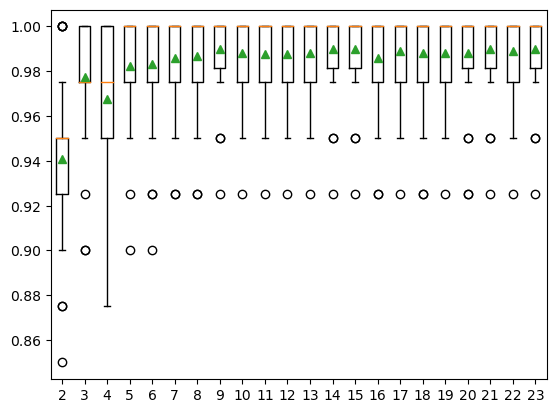

In [38]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

## It's clear that from 9 features onwards are enough for the model to reach optimality. Let's see which features are getting selected

In [39]:
# define RFE
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=9)
# fit RFE
rfe.fit(X, y)
selected=[]
# summarize all features
for i in range(X.shape[1]):
    print('Column: %s, Selected %s, Rank: %.3f' % (data.columns[i], rfe.support_[i], rfe.ranking_[i]))
    if rfe.support_[i]:
        selected.append(data.columns[i])
df = data[data.columns & selected]

Column: age, Selected False, Rank: 4.000
Column: Dias_blood_pressure, Selected False, Rank: 8.000
Column: ur_specific_gravity, Selected True, Rank: 1.000
Column: ur_albumin, Selected True, Rank: 1.000
Column: ur_sugar, Selected False, Rank: 6.000
Column: red_blood_cells, Selected False, Rank: 7.000
Column: ur_pus_cell, Selected False, Rank: 12.000
Column: ur_ pus_cell clumps, Selected False, Rank: 14.000
Column: ur_bacteria, Selected False, Rank: 16.000
Column: blood glucose random, Selected True, Rank: 1.000
Column: blood urea, Selected False, Rank: 3.000
Column: serum creatinine, Selected True, Rank: 1.000
Column: sodium, Selected False, Rank: 2.000
Column: potassium, Selected False, Rank: 11.000
Column: hemoglobin, Selected True, Rank: 1.000
Column: packed cell volume, Selected True, Rank: 1.000
Column: white blood cell count, Selected False, Rank: 9.000
Column: red blood cell count, Selected True, Rank: 1.000
Column: hypertension, Selected True, Rank: 1.000
Column: diabetes, Select

In [40]:
df.columns

Index(['ur_specific_gravity', 'ur_albumin', 'blood glucose random',
       'serum creatinine', 'hemoglobin', 'packed cell volume',
       'red blood cell count', 'hypertension', 'diabetes'],
      dtype='object')

## This can also be achieved using RFECV instead of brute forcing the number of features to select



### But first let's get the best parameters for our RandomForestClassifier to avoid variance in results.

In [41]:
from sklearn.model_selection import GridSearchCV
rfcc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfcc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [42]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [43]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=RandomForestClassifier())
model = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=4, max_features='auto', random_state=42)
pipeline = Pipeline(steps=[('s',rfecv),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# summarize all features
rfecv.fit(X, y)
feat = []
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfecv.support_[i], rfecv.ranking_[i]))
    if rfe.support_[i] == True:
        feat.append(data.columns[i])
# rfecv_df = data[data.columns & feat]

Accuracy: 0.987 (0.024)
Column: 0, Selected False, Rank: 8.000
Column: 1, Selected False, Rank: 9.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 10.000
Column: 5, Selected False, Rank: 16.000
Column: 6, Selected False, Rank: 15.000
Column: 7, Selected False, Rank: 17.000
Column: 8, Selected False, Rank: 19.000
Column: 9, Selected False, Rank: 3.000
Column: 10, Selected False, Rank: 7.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected False, Rank: 6.000
Column: 13, Selected False, Rank: 13.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected False, Rank: 12.000
Column: 17, Selected False, Rank: 2.000
Column: 18, Selected False, Rank: 5.000
Column: 19, Selected False, Rank: 4.000
Column: 20, Selected False, Rank: 20.000
Column: 21, Selected False, Rank: 11.000
Column: 22, Selected False, Rank: 14.000
Column: 23, Selected False, Rank: 18.000


In [44]:
feat

['ur_specific_gravity',
 'ur_albumin',
 'blood glucose random',
 'serum creatinine',
 'hemoglobin',
 'packed cell volume',
 'red blood cell count',
 'hypertension',
 'diabetes']

# Correlation-Based Feature Selection

### 1. Pearson Correlation

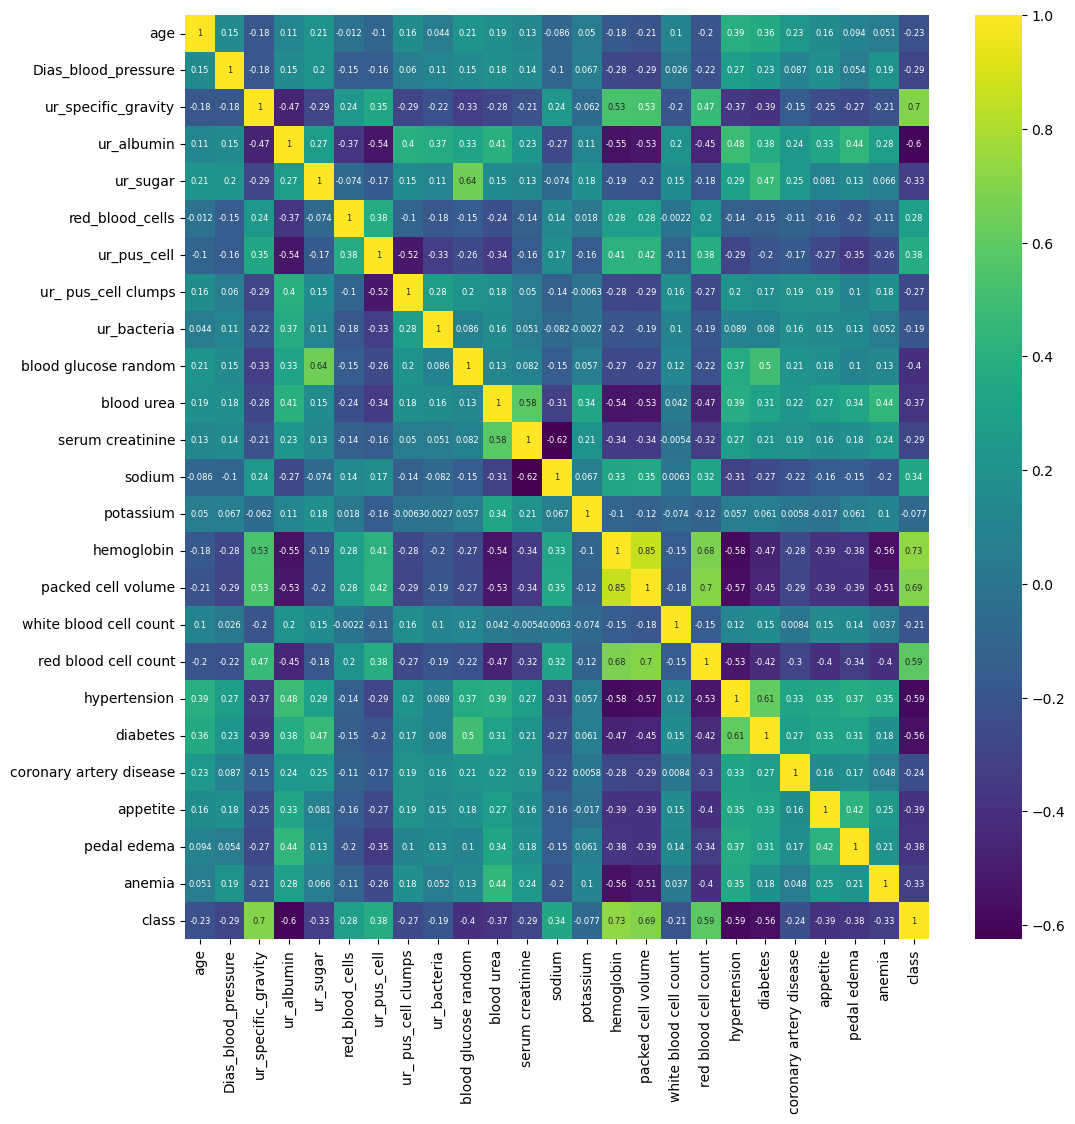

In [45]:
plt.figure(figsize=(12,12))
cor1 = data.corr()
sns.heatmap(cor1, annot=True, cmap="viridis",annot_kws={"size":6})
plt.show()

In [46]:
# Pearson correlation coefficient
corr = data.corr()["class"].sort_values(ascending=False)[1:]

# absolute for positive values
abs_corr = abs(corr)

# random threshold for features to keep
relevant_features = abs_corr[abs_corr>0.29]
type(relevant_features)
list2 = relevant_features.index.tolist()
relevant_features

hemoglobin              0.729628
ur_specific_gravity     0.698957
packed cell volume      0.690060
red blood cell count    0.590913
ur_pus_cell             0.375154
sodium                  0.342288
Dias_blood_pressure     0.290600
serum creatinine        0.294079
anemia                  0.325396
ur_sugar                0.327812
blood urea              0.372033
pedal edema             0.375154
appetite                0.393341
blood glucose random    0.401374
diabetes                0.559060
hypertension            0.590438
ur_albumin              0.599238
Name: class, dtype: float64

In [47]:
rfecv_df = data[data.columns & feat]
Corr_df = data[data.columns & relevant_features.index]
list2.remove('red blood cell count')
list2.remove('ur_pus_cell')
list2.remove('ur_specific_gravity')
list2.append('white blood cell count')
list2.append('red_blood_cells')
list2.append('potassium')
cor_df = data[data.columns & list2]

In [48]:
rfecv_df.columns

Index(['ur_specific_gravity', 'ur_albumin', 'blood glucose random',
       'serum creatinine', 'hemoglobin', 'packed cell volume',
       'red blood cell count', 'hypertension', 'diabetes'],
      dtype='object')

### As we can see, both the manual RFE with Cross Validation and RFECV methods give us the exact same result. But the Pearson Correlation Filter method substitutes Serum Creatinine and Sodium features for Appetite and Diabetes.

### This is because Correlation does not consider interactions between other features which might lead to not detecting information that can be derived from the combination of multiple features

# Modelling

In [49]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(rfecv_df, y, test_size=0.2)

### Build the AdaBoost model with RFECV

In [50]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model1.predict(X_test)

### Evaluate Model

In [51]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc, precision_score, recall_score


# calculate and print model accuracy, here we use macro averaging which treats all classes equally. 
# What good is a classifier that would always predict that the patient was healthy,
# even if it could achieve a 99% micro-averaged accuracy on the task?
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

print("AdaBoost Classifier Model Precision:", precision_score(y_test, y_pred, average='macro'))

print("AdaBoost Classifier Model Recall:", recall_score(y_test, y_pred, average='macro'))

print("AdaBoost Classifier Model F-measure:", f1_score(y_test, y_pred, average='macro'))

AdaBoost Classifier Model Accuracy: 0.9875
AdaBoost Classifier Model Precision: 0.9821428571428572
AdaBoost Classifier Model Recall: 0.9905660377358491
AdaBoost Classifier Model F-measure: 0.9861471861471862


## Modelling with Correlation-Based FS
### Build the AdaBoost model

In [52]:
X_train, X_test, y_train, y_test = train_test_split(cor_df, y, test_size=0.2)

In [53]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model1.predict(X_test)

### Evaluate Model

In [54]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc, precision_score, recall_score


# calculate and print model accuracy, here we use macro averaging which treats all classes equally. 
# What good is a classifier that would always predict that the patient was healthy,
# even if it could achieve a 99% micro-averaged accuracy on the task?
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

print("AdaBoost Classifier Model Precision:", precision_score(y_test, y_pred, average='macro'))

print("AdaBoost Classifier Model Recall:", recall_score(y_test, y_pred, average='macro'))

print("AdaBoost Classifier Model F-measure:", f1_score(y_test, y_pred, average='macro'))

AdaBoost Classifier Model Accuracy: 0.9625
AdaBoost Classifier Model Precision: 0.95
AdaBoost Classifier Model Recall: 0.9716981132075472
AdaBoost Classifier Model F-measure: 0.9591211037301993


## Support Vector Machine

In [55]:
from sklearn.svm import SVC

X_tr, X_tst, y_tr, y_tst = train_test_split(rfecv_df, y, test_size=0.2)
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_tr, y_tr)


# make predictions on test set
y_pr=linear_svc1000.predict(X_tst)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_tst, y_pr)))

Model accuracy score with linear kernel and C=1000.0 : 0.9875


In [56]:
y_pred_train = linear_svc1000.predict(X_tr)

print('Training set score: {:.4f}'.format(linear_svc1000.score(X_tr, y_tr)))

print('Test set score: {:.4f}'.format(linear_svc1000.score(X_tst, y_tst)))

Training set score: 0.9938
Test set score: 0.9875


#### Compare model accuracy with null accuracy
#### So, the model accuracy is 0.9875. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

#### So, we should first check the class distribution in the test set.

In [57]:
# check class distribution in test set

y_tst.value_counts()

0    48
1    32
Name: class, dtype: int64

In [58]:
# check null accuracy score

null_accuracy = (45/(45+35))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5625


We can see that our model accuracy score is 0.9875 but null accuracy score is 0.5625. So, we can conclude that our SVM classifier is doing a very good job in predicting the class labels.

In [59]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_tst, y_pr)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[47  1]
 [ 0 32]]

True Positives(TP) =  47

True Negatives(TN) =  32

False Positives(FP) =  1

False Negatives(FN) =  0


### The confusion matrix shows 45 + 34 = 79 correct predictions and 0 + 1 = 1 incorrect predictions.

#### In this case, we have

#### True Positives (Actual Positive:1 and Predict Positive:1) - 45
#### True Negatives (Actual Negative:0 and Predict Negative:0) - 34
#### False Positives (Actual Negative:0 but Predict Positive:1) - 0 (Type I error)
#### False Negatives (Actual Positive:1 but Predict Negative:0) - 1 (Type II error)

<AxesSubplot:>

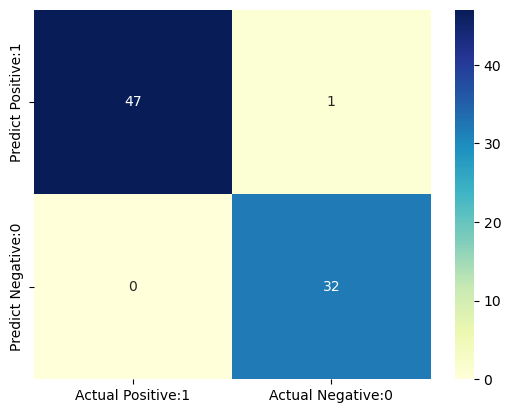

In [60]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_tst, y_pr))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.97      1.00      0.98        32

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



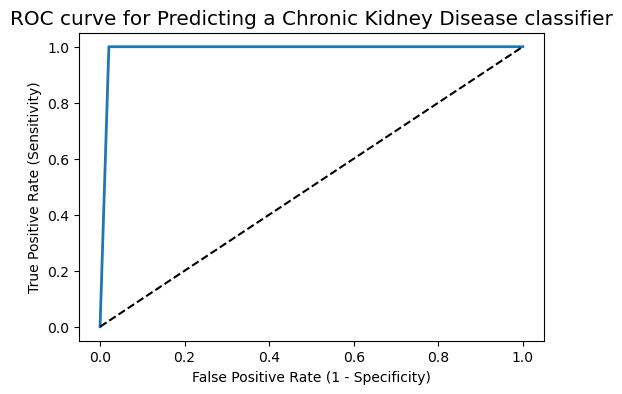

In [62]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_tst, y_pr)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Chronic Kidney Disease classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [63]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_tst, y_pr)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9896


In [64]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc1000, X_tr, y_tr, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9903


## Naive Bayes Classification

In [65]:
X_nbtrain, X_nbtest, y_nbtrain, y_nbtest = train_test_split(rfecv_df, y, test_size=0.25)

In [66]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_nbtrain, y_nbtrain)  

GaussianNB()

In [67]:
import os
import joblib

if os.path.exists("NBpipe.joblib"):
    pass
else:
    joblib.dump(classifier, r'NBpipe.joblib')

In [68]:
y_nbpred = classifier.predict(X_nbtest)

y_nbpred

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [69]:
print("Naive Bayes Classifier Model Accuracy:", accuracy_score(y_nbtest, y_nbpred))

print("Naive Bayes Classifier Model Precision:", precision_score(y_nbtest, y_nbpred))

print("Naive Bayes Classifier Model Recall:", recall_score(y_nbtest, y_nbpred))

print("Naive Bayes Classifier Model F-measure:", f1_score(y_nbtest, y_nbpred))

Naive Bayes Classifier Model Accuracy: 0.92
Naive Bayes Classifier Model Precision: 0.7777777777777778
Naive Bayes Classifier Model Recall: 1.0
Naive Bayes Classifier Model F-measure: 0.8750000000000001


#### Check for overfitting and underfitting

In [70]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(classifier.score(X_nbtrain, y_nbtrain)))

print('Test set score: {:.4f}'.format(classifier.score(X_nbtest, y_nbtest)))

Training set score: 0.9533
Test set score: 0.9200


#### The training-set accuracy score is 0.9567 while the test-set accuracy to be 0.9400. These two values are quite comparable. So, 
#### there is no sign of overfitting.

#### Compare model accuracy with null accuracy

So, the model accuracy is 0.9400. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [71]:
# check class distribution in test set

y_nbtest.value_counts()

0    72
1    28
Name: class, dtype: int64

We can see that the occurences of most frequent class is 65. So, we can calculate null accuracy by dividing 65 by total number of occurences

In [72]:
# check null accuracy score

null_accuracy = (65/(65+35))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6500


We can see that our model accuracy score is 0.9400 but null accuracy score is 0.6500. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue

### Confusion matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [73]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

nbcm = confusion_matrix(y_nbtest, y_nbpred)

print('Confusion matrix\n\n', nbcm)

print('\nTrue Positives(TP) = ', nbcm[0,0])

print('\nTrue Negatives(TN) = ', nbcm[1,1])

print('\nFalse Positives(FP) = ', nbcm[0,1])

print('\nFalse Negatives(FN) = ', nbcm[1,0])

Confusion matrix

 [[64  8]
 [ 0 28]]

True Positives(TP) =  64

True Negatives(TN) =  28

False Positives(FP) =  8

False Negatives(FN) =  0


The confusion matrix shows 59 + 35 = 94 correct predictions and 6 + 0 = 6 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 59

True Negatives (Actual Negative:0 and Predict Negative:0) - 35

False Positives (Actual Negative:0 but Predict Positive:1) - 6 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 0 (Type II error)

<AxesSubplot:>

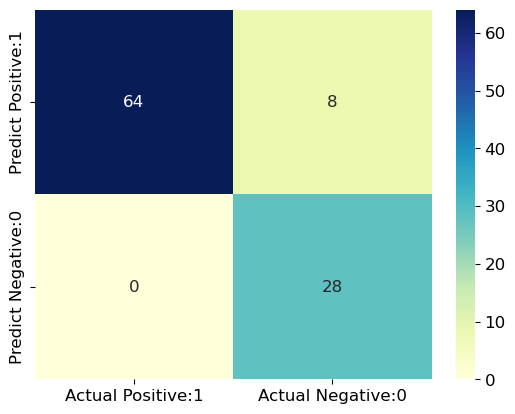

In [74]:
# visualize confusion matrix with seaborn heatmap

nbcm_matrix = pd.DataFrame(data=nbcm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(nbcm_matrix, annot=True, fmt='d', cmap='YlGnBu')

ROC Curve
Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

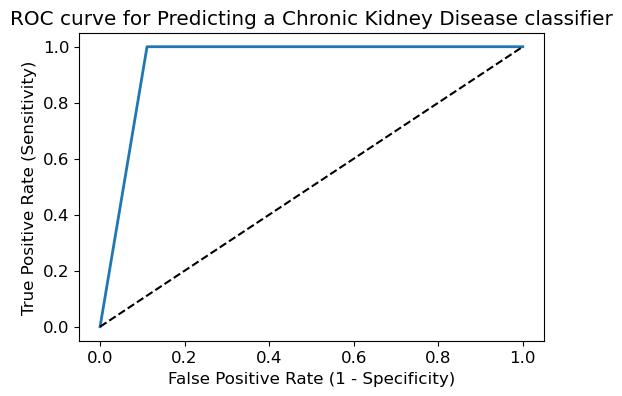

In [75]:
fpr, tpr, thresholds = roc_curve(y_nbtest, y_nbpred)# Plot heatmap

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Chronic Kidney Disease classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

### Classification metrices 

#### Classification Report
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:

In [76]:
print(classification_report(y_nbtest, y_nbpred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        72
           1       0.78      1.00      0.88        28

    accuracy                           0.92       100
   macro avg       0.89      0.94      0.91       100
weighted avg       0.94      0.92      0.92       100



#### Classification accuracy

In [77]:
TP = nbcm[0,0]
TN = nbcm[1,1]
FP = nbcm[0,1]
FN = nbcm[1,0]

In [78]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9200


#### Classification error

In [79]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0800


#### Precision
Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [80]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8889


#### Recall
Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [81]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


#### True Positive Rate
True Positive Rate is synonymous with Recall.

In [82]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 1.0000


#### False Positive Rate

In [83]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2222


#### Specificity

In [84]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7778


#### f1-score
f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

#### Support
Support is the actual number of occurrences of the class in our dataset.

### Calculate class probabilities 

In [85]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_nbpred_prob = classifier.predict_proba(X_nbtest)[0:10]

y_nbpred_prob

array([[1.00000000e+00, 0.00000000e+00],
       [2.24965871e-10, 1.00000000e+00],
       [9.61204975e-10, 9.99999999e-01],
       [1.00000000e+00, 8.33808560e-16],
       [1.47829460e-10, 1.00000000e+00],
       [5.50986345e-12, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.89459367e-12, 1.00000000e+00],
       [2.58714907e-13, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00]])

In [86]:
# store the probabilities in dataframe

y_nbpred_prob_df = pd.DataFrame(data=y_nbpred_prob, columns=['Prob of having ckd', 'Prob of not having ckd'])

y_nbpred_prob_df

,Prob of having ckd,Prob of not having ckd
0,1.000000e+00,0.000000e+00
1,2.249659e-10,1.000000e+00
2,9.612050e-10,1.000000e+00
3,1.000000e+00,8.338086e-16
4,1.478295e-10,1.000000e+00
5,5.509863e-12,1.000000e+00
6,1.000000e+00,0.000000e+00
7,1.894594e-12,1.000000e+00
8,2.587149e-13,1.000000e+00
9,1.000000e+00,0.000000e+00


In [87]:
# print the first 10 predicted probabilities for class 1

classifier.predict_proba(X_nbtest)[0:10, 1]

array([0.00000000e+00, 1.00000000e+00, 9.99999999e-01, 8.33808560e-16,
       1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 0.00000000e+00])

In [88]:
# store the predicted probabilities for class 1 

y_nbpred1 = classifier.predict_proba(X_nbtest)[:, 1]

Text(0, 0.5, 'Frequency')

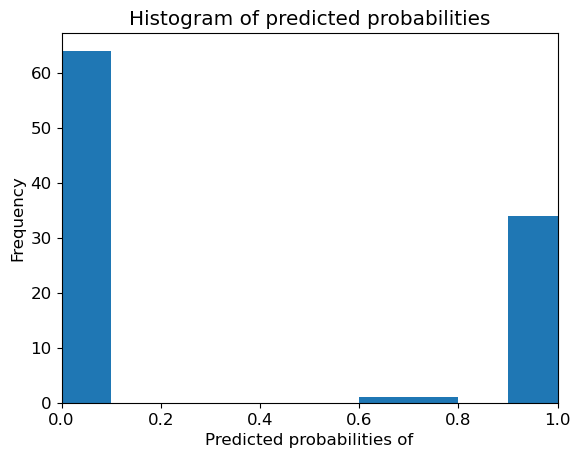

In [89]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_nbpred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of')
plt.ylabel('Frequency')

## KNN Classifier

In [90]:
x_knntrain, x_knntest, y_knntrain, y_knntest = train_test_split(rfecv_df, y, test_size=0.2)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#trying the knn with 20 neighbors
knn=KNeighborsClassifier(n_neighbors=25)
knn.fit(x_knntrain,y_knntrain) 
y_knnpred=knn.predict(x_knntest) 
print("KNN Classifier Model Accuracy:", accuracy_score(y_knntest, y_knnpred))

print("KNN Classifier Model Precision:", precision_score(y_knntest, y_knnpred))

print("KNN Classifier Model Recall:", recall_score(y_knntest, y_knnpred))

print("KNN Classifier Model F-measure:", f1_score(y_knntest, y_knnpred))

KNN Classifier Model Accuracy: 0.9625
KNN Classifier Model Precision: 0.9142857142857143
KNN Classifier Model Recall: 1.0
KNN Classifier Model F-measure: 0.955223880597015


In [92]:
#trying all the possibilities of neighbors between 1 and 30
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_knntrain,y_knntrain)
    y_knnpred=knn.predict(x_knntest)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_knnpred,y_knntest),2))
    scores.append(round(accuracy_score(y_knnpred,y_knntest),2))

Accuracy for k= 1 is: 0.98
Accuracy for k= 2 is: 0.99
Accuracy for k= 3 is: 0.99
Accuracy for k= 4 is: 0.99
Accuracy for k= 5 is: 0.96
Accuracy for k= 6 is: 0.96
Accuracy for k= 7 is: 0.95
Accuracy for k= 8 is: 0.96
Accuracy for k= 9 is: 0.95
Accuracy for k= 10 is: 0.95
Accuracy for k= 11 is: 0.95
Accuracy for k= 12 is: 0.96
Accuracy for k= 13 is: 0.95
Accuracy for k= 14 is: 0.96
Accuracy for k= 15 is: 0.95
Accuracy for k= 16 is: 0.95
Accuracy for k= 17 is: 0.96
Accuracy for k= 18 is: 0.96
Accuracy for k= 19 is: 0.98
Accuracy for k= 20 is: 0.98
Accuracy for k= 21 is: 0.98
Accuracy for k= 22 is: 0.96
Accuracy for k= 23 is: 0.98
Accuracy for k= 24 is: 0.96
Accuracy for k= 25 is: 0.96
Accuracy for k= 26 is: 0.96
Accuracy for k= 27 is: 0.96
Accuracy for k= 28 is: 0.92
Accuracy for k= 29 is: 0.95


k=5 is the best of neibors with accuracy of 0.98

## Decision Tree Classifier

In [93]:
x_dttrain, x_dttest, y_dttrain, y_dttest = train_test_split(X, y, test_size=0.2)

In [94]:
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
DTC = tree.DecisionTreeClassifier()  
DTC.fit(x_dttrain, y_dttrain)  
y_dtpred=DTC.predict(x_dttest)  
print("Decision Tree Classifier Model Accuracy:", accuracy_score(y_dttest, y_dtpred))

print("Decision Tree Classifier Model Precision:", precision_score(y_dttest, y_dtpred))

print("Decision Tree Classifier Model Recall:", recall_score(y_dttest, y_dtpred))

print("Decision TreeKNN Classifier Model F-measure:", f1_score(y_dttest, y_dtpred))

Decision Tree Classifier Model Accuracy: 0.9875
Decision Tree Classifier Model Precision: 1.0
Decision Tree Classifier Model Recall: 0.9655172413793104
Decision TreeKNN Classifier Model F-measure: 0.9824561403508771


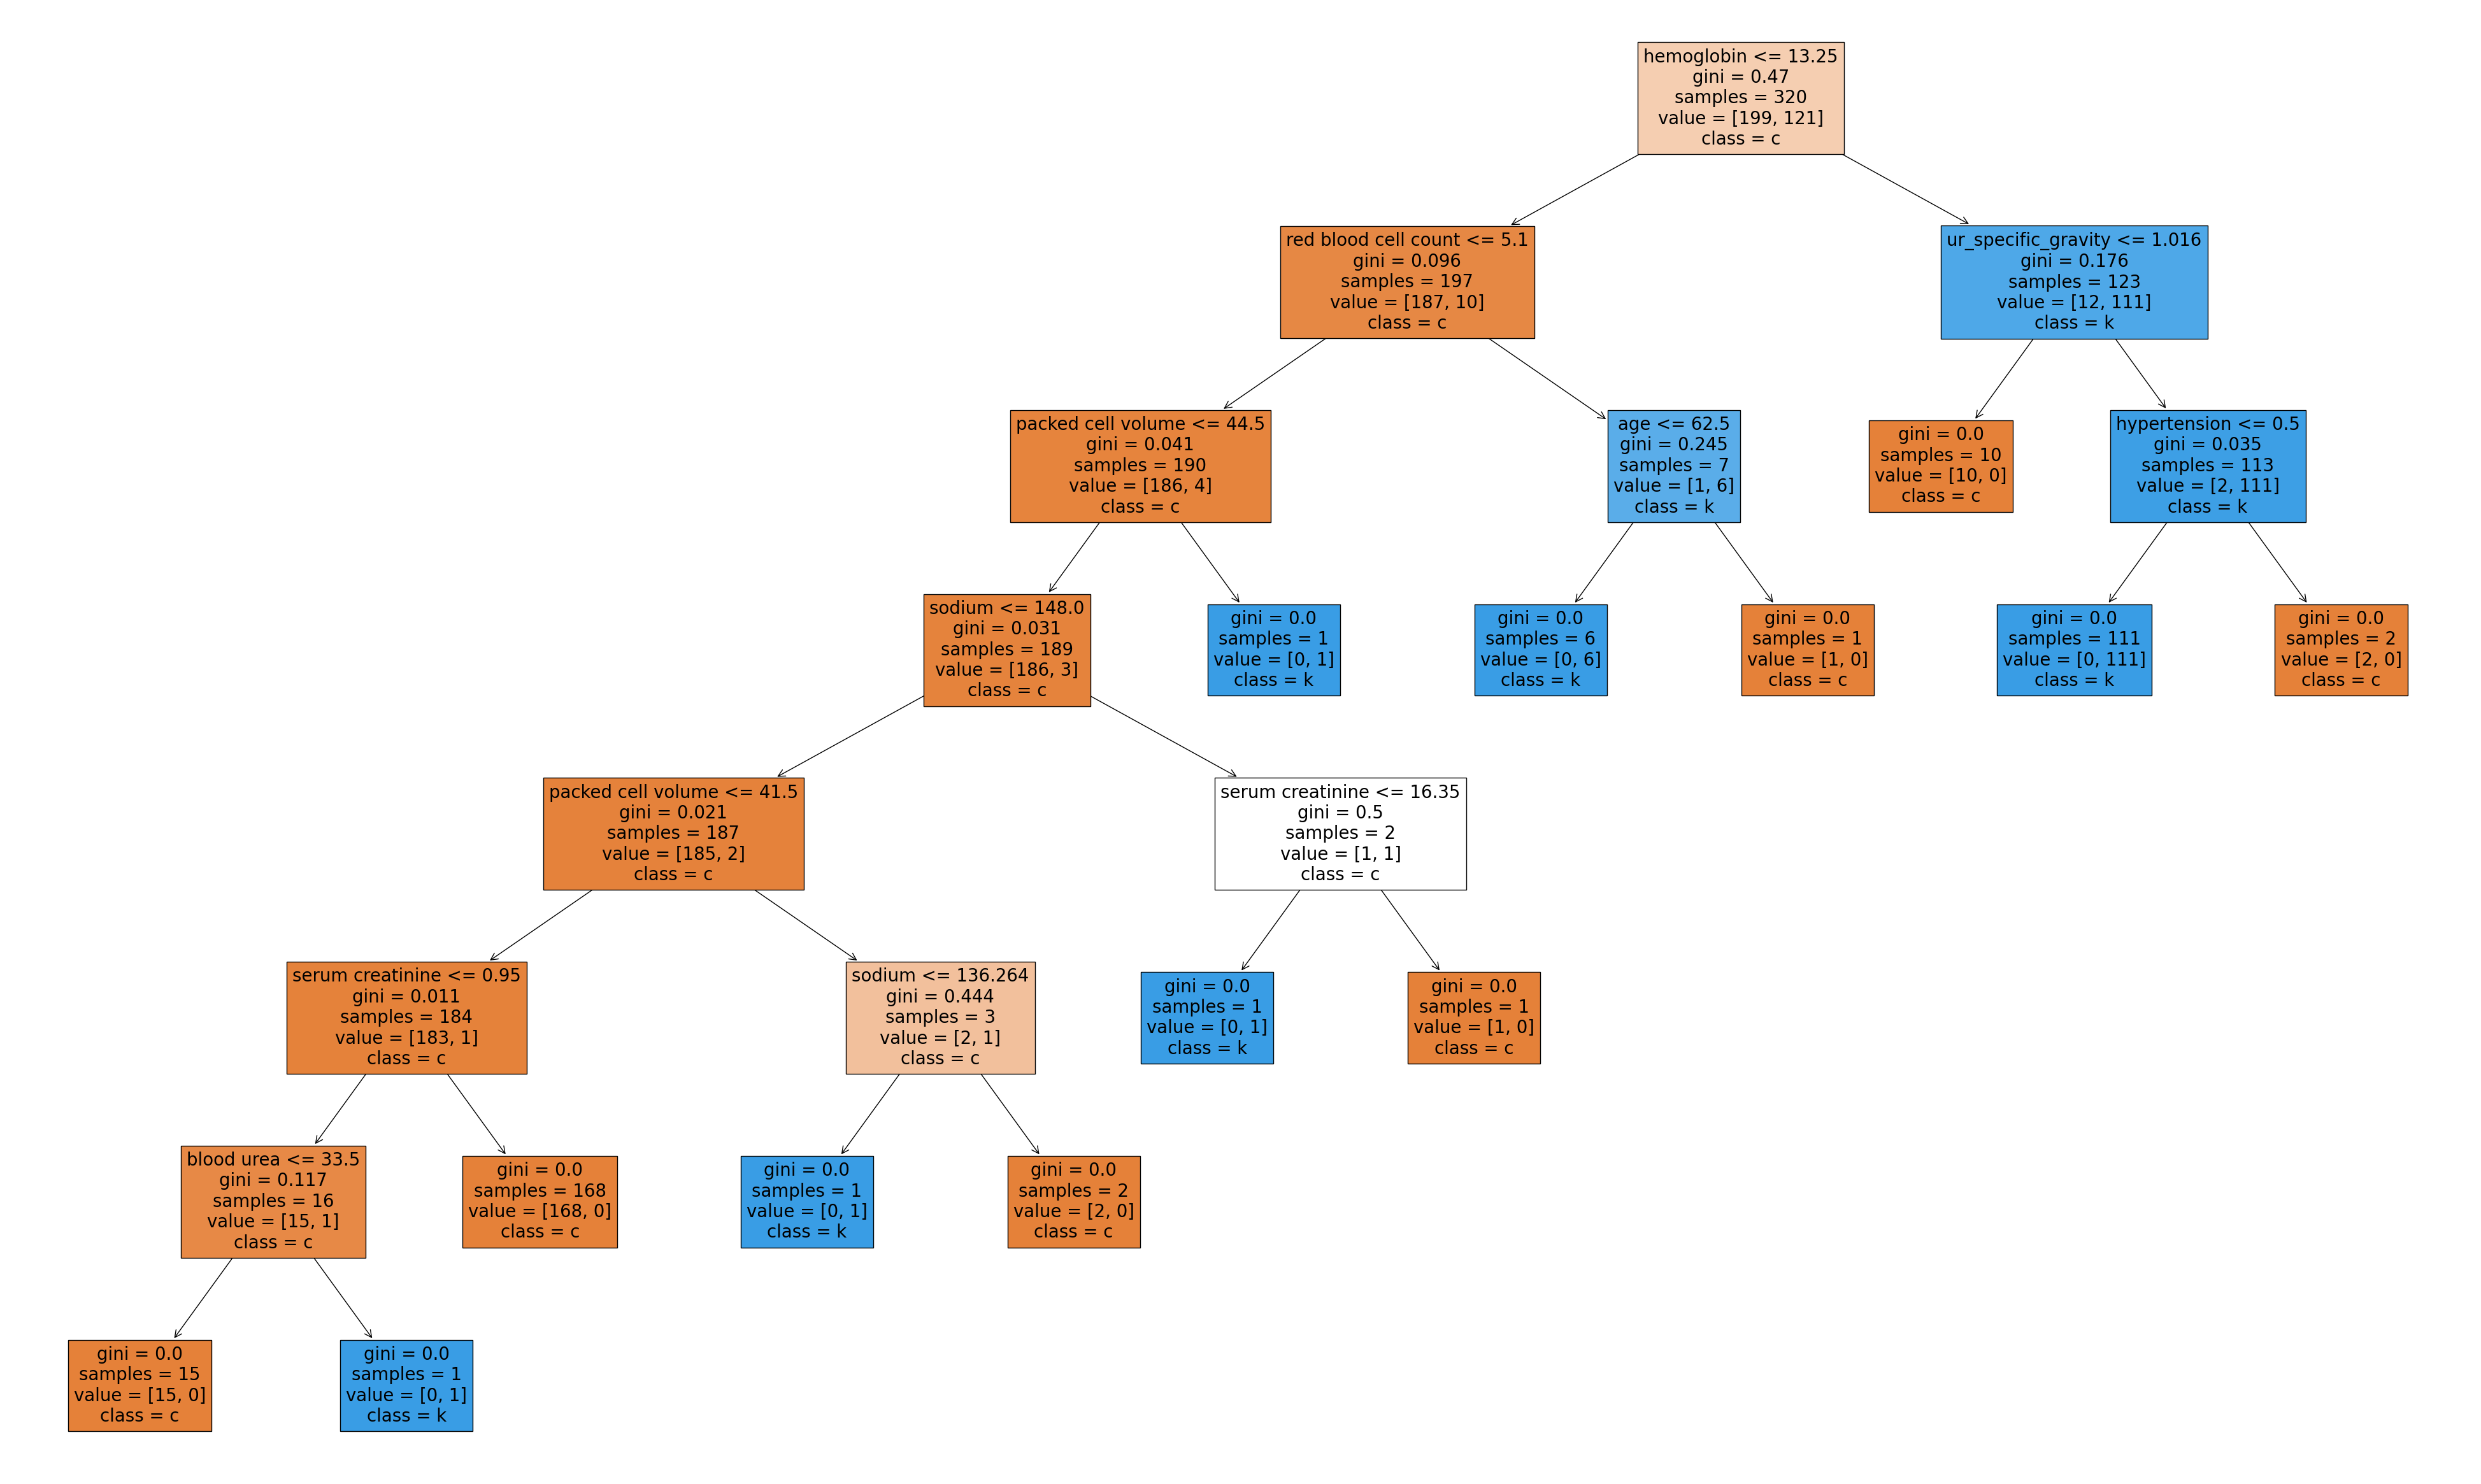

In [95]:
from matplotlib import pyplot as plt
from sklearn import tree
listc = X.columns.tolist()
fig = plt.figure(figsize=(50,30))
_ = tree.plot_tree(DTC, 
                   feature_names=listc,  
                   class_names='ckd',
                   filled=True)

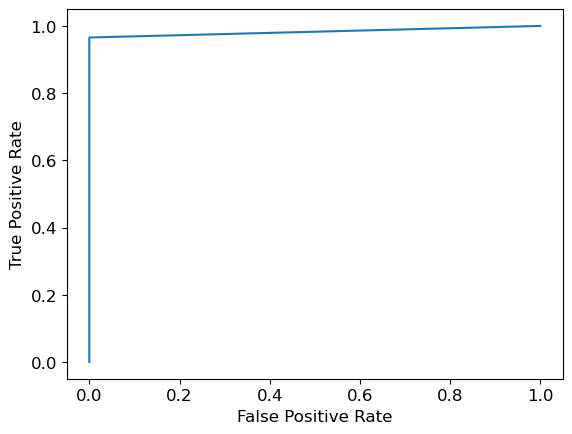

In [96]:
fpr, tpr, _ = roc_curve(y_dttest,  y_dtpred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

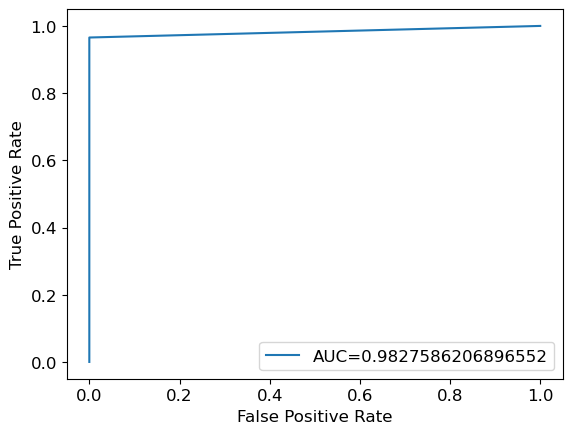

In [97]:
auc = roc_auc_score(y_dttest, y_dtpred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Filter-Based Feature Selection

In [98]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(x_dttrain)

VarianceThreshold(threshold=0)

In [99]:
len(x_dttrain.columns[constant_filter.get_support()])

24

In [100]:
constant_columns = [column for column in x_dttrain.columns
                    if column not in x_dttrain.columns[constant_filter.get_support()]]

print(len(constant_columns))

0


In [101]:
qconstant_filter = VarianceThreshold(threshold=0.01)
qconstant_filter.fit(x_dttrain)
len(x_dttrain.columns[qconstant_filter.get_support()])

23

In [102]:
qconstant_columns = [column for column in x_dttrain.columns
                    if column not in x_dttrain.columns[qconstant_filter.get_support()]]

print(len(qconstant_columns))

1


In [103]:
for column in qconstant_columns:
    print(column)

ur_specific_gravity


In [104]:
X_dtttrain = qconstant_filter.transform(x_dttrain)
X_dtttest = qconstant_filter.transform(x_dttrain)

In [105]:
X_dtttrain.shape, X_dtttest.shape

((320, 23), (320, 23))

In [106]:
X_train_T = X_dtttrain.T
X_train_T.shape

X_train_T = pd.DataFrame(X_train_T)
type(X_train_T)

pandas.core.frame.DataFrame

In [107]:
print(X_train_T.duplicated().sum())

0


In [108]:
correlated_features = set()
X_dtttrain = pd.DataFrame(X_dtttrain)
correlation_matrix = X_dtttrain.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [109]:
len(correlated_features)

1

In [110]:
print(correlated_features)

{14}


In [111]:
X_dtttest = pd.DataFrame(X_dtttest)
X_dtttrain = pd.DataFrame(X_dtttrain)
# X_dtttrain.drop([9] , axis = 1 , inplace = True)
# X_dtttest.drop([9] , axis = 1 , inplace = True)

In [112]:
dtree_2 = DecisionTreeClassifier()
dtree_2 = dtree_2.fit(X_dtttrain, y_dttrain)

In [113]:
y_dttest.shape

(80,)

In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_dtttpred = dtree_2.predict(X_dtttest)
print(" accuracy: {0:.5f}".format(accuracy_score(y_dttest, y_dtttpred)))
print("precision: {0:.5f}".format(precision_score(y_dttest, y_dtttpred)))
print("   recall: {0:.5f}".format(recall_score(y_dttest, y_dtttpred)))
print(" f1 score: {0:.5f}".format(f1_score(y_dttest, y_dtttpred)))

ValueError: Found input variables with inconsistent numbers of samples: [80, 320]

## Random Forest Classifier

In [ ]:
x_rftrain, x_rftest, y_rftrain, y_rftest = train_test_split(rfecv_df, y, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rfc=RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=4, max_features='auto', random_state=42) 
rfc.fit(x_rftrain, y_rftrain)  
y_rfpred=rfc.predict(x_rftest)
RandomForestClf_accuracy_score = metrics.accuracy_score(y_rftest, y_rfpred)
print("Random Forest Classifier Model Accuracy:", accuracy_score(y_rftest, y_rfpred))

print("Random Forest Classifier Model Precision:", precision_score(y_rftest, y_rfpred))

print("Random Forest Classifier Model Recall:", recall_score(y_rftest, y_rfpred))

print("Random Forest Classifier Model F-measure:", f1_score(y_rftest, y_rfpred))

In [ ]:
scores = cross_val_score(rfc, x_rftrain, y_rftrain,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_rftest, y_rfpred)

print('Confusion matrix\n\n')

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

In [ ]:
sns.heatmap(cm, square=True , annot=True)

In [ ]:
print(classification_report(y_rftest, y_rfpred))

In [ ]:
#Accuracy 
X_rfpred=rfc.predict(x_rftrain)
print(accuracy_score(y_rftest, y_rfpred))
print(accuracy_score(y_rftrain, X_rfpred))

In [ ]:
#Recall
print(recall_score(y_rftest, y_rfpred,average='macro'))
print(recall_score(y_rftrain, X_rfpred, average='macro'))

In [ ]:
#Precision 
print(precision_score(y_rftest, y_rfpred,average='macro'))
print(precision_score(y_rftrain, X_rfpred, average='macro'))

In [ ]:
feature_importance=pd.DataFrame({'rfc':rfc.feature_importances_},index=rfecv_df.columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

In [ ]:
data.loc[data['ur_albumin'] != 0.0]

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = ['LinearSVM','Random Forest', 'Decision Tree', 'KNeighbors', 'Naive_Bayes', 'SVM_AdaBoost', 'NB_AdaBoost']

models = [SVC(kernel='linear', C=1000.0),
          RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=4, max_features='auto', random_state=42),
          DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0),
          KNeighborsClassifier(n_neighbors=3, metric = 'euclidean'),
          GaussianNB(),
          AdaBoostClassifier(base_estimator=SVC(kernel='linear', C=1000.0), algorithm='SAMME',n_estimators=100,random_state=100),
          AdaBoostClassifier(base_estimator=GaussianNB(), algorithm='SAMME',n_estimators=100,random_state=100)]

def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.2, random_state=42)
    return X_tr, X_te, Y_tr, Y_te

def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    prec = []
    rec = []
    f_score = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        prec.append(precision_score(Y_test, predictions))
        rec.append(recall_score(Y_test, predictions))
        f_score.append(f1_score(Y_test, predictions))
        j = j+1     
    Score["Accuracy"] = acc
    Score["Precision"] = prec
    Score["Recall"] = rec
    Score["F-Measure"] = f_score
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

In [139]:
from imblearn.over_sampling import SMOTE

over = SMOTE(sampling_strategy=1) 
X_over,y_over = over.fit_resample(X,y)

In [ ]:
score_2 = acc_score(rfecv_df,y)
score_2

In [ ]:
score1 = acc_score(X_over,y_over)
score1

# XGBoost

In [145]:
# import xgboost
import xgboost as xgb

# split data into training and testing sets
X_gbtrain, X_gbtest, y_gbtrain, y_gbtest = train_test_split(rfecv_df, y, test_size=0.2, random_state=123)

# create the xgboost model
xgb_model = xgb.XGBClassifier(    objective= 'binary:logistic',
    max_depth= 3, 
    learning_rate= 0.1, 
    subsample= 0.5, 
    colsample_bytree= 0.8, 
    nthread= 4,
    seed= 4242,
    n_estimators=10)

# fit the model
xgb_model.fit(X_gbtrain, y_gbtrain)

# make predictions
y_gbpred = xgb_model.predict(X_gbtest)
x_gbpred = xgb_model.predict(X_gbtrain)

In [147]:
#evaluate model
accuracy = accuracy_score(y_gbtest,y_gbpred)
precision = precision_score(y_gbtest,y_gbpred)
recall = recall_score(y_gbtest,y_gbpred)
fscore = f1_score(y_gbtest,y_gbpred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy: %.2f%%" % (precision * 100.0))
print("Accuracy: %.2f%%" % (recall * 100.0))
print("Accuracy: %.2f%%" % (fscore * 100.0))

Accuracy: 97.50%
Accuracy: 96.30%
Accuracy: 96.30%
Accuracy: 96.30%
